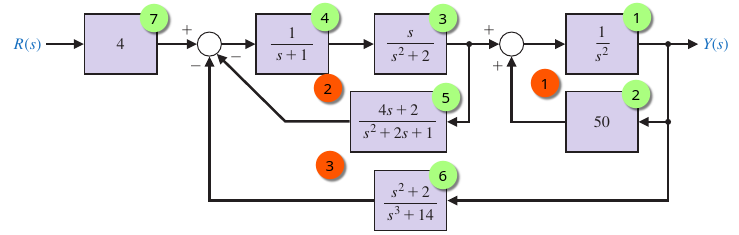

In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

n1 = ct.tf([1], [1, 0, 0])
n2 = 50

n3 = ct.tf([1, 0], [1, 0, 2])
n4 = ct.tf([1], [1, 1])
n5 = ct.tf([4, 2], [1, 2, 1])

n6 = ct.tf([1, 0, 2], [1, 0, 0, 14])
n7 = 4

l1 = ct.feedback(n1, n2, 1)
l2 = ct.feedback(ct.series(n4, n3), n5)

l3 = ct.feedback(ct.series(l2, l1), n6)

sys = ct.series(n7, l3)
print(sys)
pzmap = ct.pole_zero_map(sys)

<TransferFunction>: sys[12]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                             4 s^6 + 8 s^5 + 4 s^4 + 56 s^3 + 112 s^2 + 56 s
  -----------------------------------------------------------------------------------------------------
  s^10 + 3 s^9 - 45 s^8 - 125 s^7 - 200 s^6 - 1177 s^5 - 2344 s^4 - 3485 s^3 - 7668 s^2 - 5598 s - 1400


In [2]:
pzmap.poles

array([ 7.07090056+0.j        , -7.07131426+0.j        ,
        1.20510123+2.08631668j,  1.20510123-2.08631668j,
        0.12191166+1.83738343j,  0.12191166-1.83738343j,
       -2.39326001+0.j        , -2.33332115+0.j        ,
       -0.46351546+0.19970853j, -0.46351546-0.19970853j])

In [3]:
pzmap.zeros

array([ 1.20507113+2.08724443e+00j,  1.20507113-2.08724443e+00j,
       -2.41014226+0.00000000e+00j, -1.        +1.78147413e-08j,
       -1.        -1.78147413e-08j,  0.        +0.00000000e+00j])

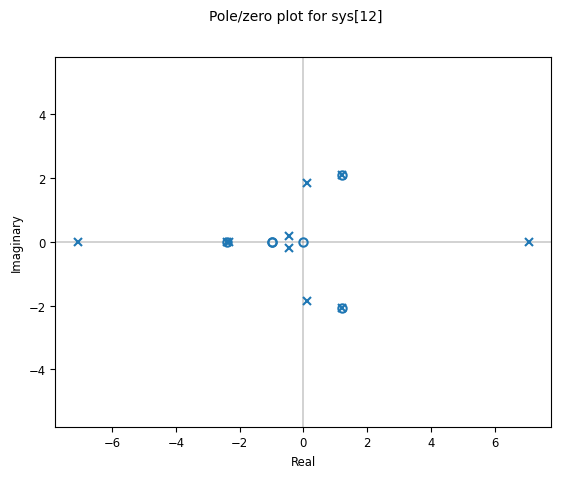

In [4]:
pzmap.plot()

I spotted some overlapping poles and zeros. Let's get rid of them

0 states have been removed from the model


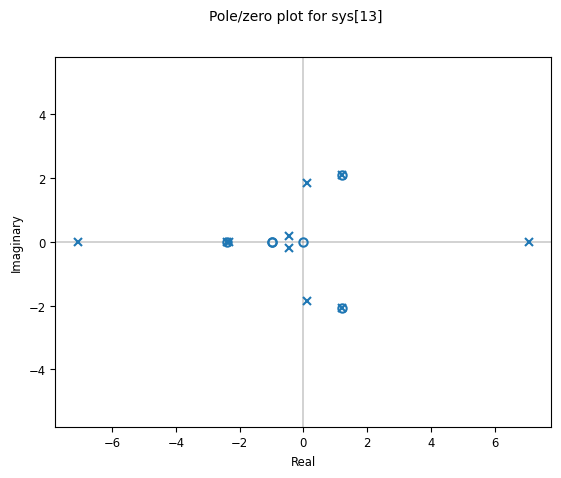

In [5]:
sys_min = ct.minreal(sys)
pzmap_min = ct.pole_zero_map(sys_min)
pzmap_min.plot()

Looks like they are not identical and I think I can set some tolerance to minreal but whatever :/